# Environment setting

In [1]:
# move to source directory
%pwd
%cd ../
%pwd
%ls

/home/yh/git/kaggle_ieee-fraud-detection
LICENSE*    data/                   log/          startup-jupyter.sh*
Makefile*   deprecated/             model/        test/
README.md*  feature/                notebook/     util/
config/     kaggle-submit-ieee.sh*  run_gbdt.py*


In [2]:
# import major modules
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
sys.stdout.flush()

In [15]:
# Set this
from config.config_0011 import config
#dsize = '.small'
dsize = ''
fold = 1
from util.easydict import EasyDict
c = EasyDict(config)

# Read data

In [16]:
c

{'runtime': {'ROOTDIR': PosixPath('/home/yh/git/kaggle_ieee-fraud-detection'),
  'VERSION': '0011',
  'RANDOM_SEED': 42,
  'USE_SMALL_DATA': False},
 'features': ['magic'],
 'model': {'TYPE': 'lgb',
  'params': {'boosting_type': 'gbdt',
   'num_leaves': 491,
   'max_depth': -1,
   'learning_rate': 0.006883242363721497,
   'objective': 'binary',
   'min_child_weight': 0.03454472573214212,
   'reg_alpha': 0.3899927210061127,
   'reg_lambda': 0.6485237330340494,
   'random_state': 47,
   'feature_fraction': 0.3797454081646243,
   'bagging_fraction': 0.4181193142567742,
   'min_data_in_leaf': 106,
   'bagging_seed': 11,
   'metric': 'auc',
   'verbosity': -1,
   'max_bin': 255}},
 'trainer': {'n_splits': 5,
  'num_boost_round': 5000,
  'early_stopping_rounds': 100},
 'slackauth': {'HOST': 'slack.com',
  'URL': '/api/chat.postMessage',
  'CHANNEL': 'ieee-fraud-detection',
  'NO_SEND_MESSAGE': False,
  'TOKEN_PATH': PosixPath('/root/.slack_token')}}

In [17]:
out_transformed_train_path = c.runtime.ROOTDIR / 'data/feature' / f'transformed_{c.runtime.VERSION}_train{dsize}.pkl'
out_transformed_test_path = c.runtime.ROOTDIR / 'data/feature' / f'transformed_{c.runtime.VERSION}_test{dsize}.pkl'
out_model_dir = c.runtime.ROOTDIR / 'data/model' / f'model_{c.runtime.VERSION}_{c.model.TYPE}{dsize}.pkl'
out_model_fold_dir = c.runtime.ROOTDIR / 'data/model' / f'model_{c.runtime.VERSION}_{c.model.TYPE}_fold{fold}{dsize}.pkl'
importance_path = c.runtime.ROOTDIR / 'feature/importance' / f'importance_{c.runtime.VERSION}{dsize}.csv'
out_sub_path = c.runtime.ROOTDIR / 'data/submission' / f'submission_{c.runtime.VERSION}{dsize}.csv'
train_log_path = c.runtime.ROOTDIR / 'log' / f'train_{c.runtime.VERSION}{dsize}.tsv'
main_log_path = c.runtime.ROOTDIR / 'log' / f'main_{c.runtime.VERSION}{dsize}.log'

In [18]:
log = pd.read_csv(train_log_path, delimiter='\t')
print(log.shape)
log.head()

(8900, 4)


,fold,iteration,train_auc,val_auc
0,1,1,0.933264,0.808523
1,1,2,0.944872,0.840973
2,1,3,0.951751,0.861101
3,1,4,0.955347,0.873585
4,1,5,0.957909,0.877546


Text(0, 0.5, 'auc')

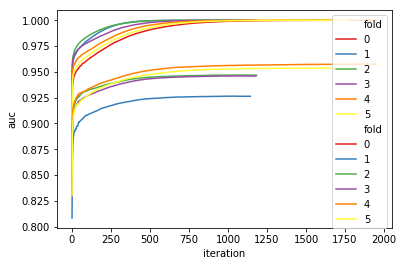

In [19]:
sns.lineplot(x="iteration", y="train_auc", data=log, palette=sns.color_palette("Set1",max(log['fold'])+1), hue='fold')
sns.lineplot(x="iteration", y="val_auc"  , data=log, palette=sns.color_palette("Set1",max(log['fold'])+1), hue='fold')
plt.ylabel('auc')

In [20]:
importance = pd.read_csv(importance_path)
importance.columns = ['feature', 'importance']
importance.head()

,feature,importance
0,TransactionAmt,134963.344862
1,ProductCD,30608.762266
2,card1,101806.869562
3,card2,94185.317119
4,card3,26996.293384


In [21]:
data = importance.sort_values(by="importance", ascending=False)[0:20]
data.head()

,feature,importance
135,V258,560445.970650
134,V257,483652.892179
24,C13,234159.999157
13,C1,227633.133752
25,C14,213000.236108


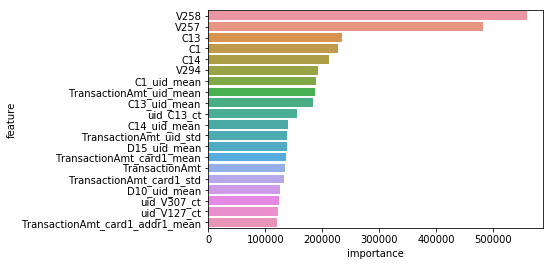

In [22]:
sns.barplot(x="importance", y="feature", data=data);

In [73]:
importance_path

PosixPath('/home/yh/git/kaggle_ieee-fraud-detection/feature/importance/importance_0010.csv')